In [472]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

In [473]:
def show_with_plt(color_img, title):


    img_RGB = color_img[:, :, ::-1]
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis("off")

plt.figure(figsize=(20, 20))
plt.suptitle("Smoothing Technique", fontsize=14, fontweight="bold")


Text(0.5, 0.98, 'Smoothing Technique')

<Figure size 1440x1440 with 0 Axes>

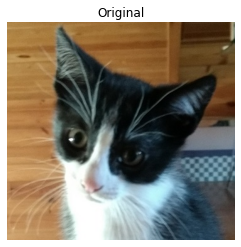

In [474]:
image = cv2.imread("images/cat-face.png")
show_with_plt(image, "Original")

In [475]:
#Creating a kernel for smooting images

kernel_avg_10_10 = np.ones((10,10), np.float32) / 100

In [476]:
# Additionally, if you know the values, you can put them directly in the kernel:
# kernel_averaging_5_5 = np.ones((5, 5), np.float32)/25
kernel_averaging_5_5 = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                                 [0.04, 0.04, 0.04, 0.04, 0.04],
                                 [0.04, 0.04, 0.04, 0.04, 0.04],
                                 [0.04, 0.04, 0.04, 0.04, 0.04],
                                 [0.04, 0.04, 0.04, 0.04, 0.04]])

print("kernel: {}".format(kernel_averaging_5_5))

kernel: [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


``cv2.filter2D`` function apply an arbitary kernel to an image, convolving the image with kernel specified

In [477]:
smooth_image_f2D_5_5 = cv2.filter2D(image, -1, kernel_averaging_5_5)
smooth_image_f2D_10_10 = cv2.filter2D(image, -1, kernel_avg_10_10) #depth = -1, the output image will have the same depth as the source.

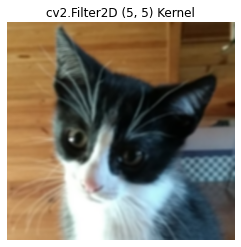

In [478]:
show_with_plt(smooth_image_f2D_5_5, "cv2.Filter2D (5, 5) Kernel")

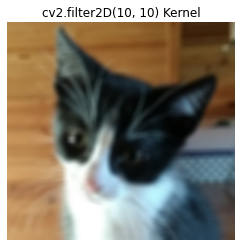

In [479]:
show_with_plt(smooth_image_f2D_10_10, "cv2.filter2D(10, 10) Kernel")

``cv2.blur`` smooths an image using the normalized box filter. They simply take the average of all the pixels under the
kernel area and replace the central element with this average.

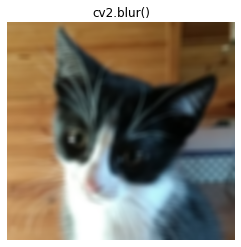

In [480]:
smooth_image_b = cv2.blur(image, (10,10))
show_with_plt(smooth_image_b, "cv2.blur()")

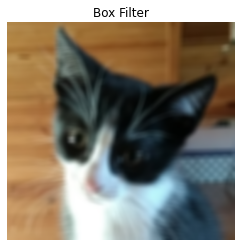

In [481]:
#When the parameter normalize of cv2.boxFilter() is equal to True, cv2.blur() and cv2.boxFilter() performs the same operation 

smooth_image_bfi = cv2.boxFilter(image, -1, (10,10), normalize=True)
show_with_plt(smooth_image_bfi, "Box Filter")

``cv2.GaussianBlur()`` convolves the image with Gaussian kernel, where kernel can be controlled using ``ksize``, ``sigmaX`` for the standard deviation in the X-direction, and ``sigmaY`` for the standard deviation in the Y-direction.

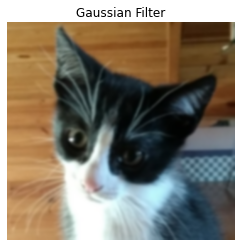

In [482]:
smooth_image_gaussian = cv2.GaussianBlur(image, (9,9), 0)
show_with_plt(smooth_image_gaussian, "Gaussian Filter")


``cv2.medianBlur()`` blurs the image with median kernel 
    

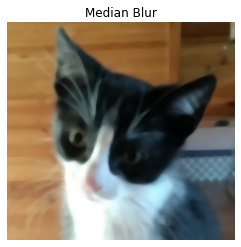

In [483]:
smooth_image_median_b = cv2.medianBlur(image, 9)
show_with_plt(smooth_image_median_b, "Median Blur")

``cv2.bilateralFilter()`` can be applied to reduce noise while
keeping the edges sharp

In [484]:
smooth_image_bilateral_f1 = cv2.bilateralFilter(image, 5, 10, 10)
smooth_image_bilateral_f2 = cv2.bilateralFilter(image, 9, 200, 200)

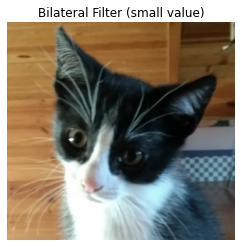

In [485]:
show_with_plt(smooth_image_bilateral_f1, "Bilateral Filter (small value)")

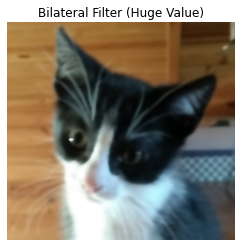

In [486]:
show_with_plt(smooth_image_bilateral_f2, "Bilateral Filter (Huge Value)")